# Descriptive Statistics

## Terminology
- population
    - keseluruhan data yang bersangkutan. misalkan kita mau tau harga rata-rata rumah di Indonesia. artinya data population rumah Indonesia adalah harga seluruh rumah yang ada di Indonesia, di semua kota, di semua propinsi, semua jenis pemilik, semua jenis rumah. 
    - biasanya tidak realistis untuk bisa dapat keseluruhan data population.
- sample
    - sebagian dari population
    - sample yang baik akan mengambil data dari bagian2 berbeda di population
    - contoh, harga rumah, jangan ambil sample khusus "harga rumah yang dijual online di Jakarta" saja, jadinya sample nya kurang bisa merepresentasika "harga rumah di Indonesia"
- outlier
    - data yang beda jauh dari tengah data. data yang beda sendiri. luar biasa.
    - data yang ada diatas angka Q3 + 1.5 x (IQR) 
    - data yang ada dibawah angka Q1 - 1.5 x (IQR)
    - secara visual bisa dilihat di box plot

## Measure of Central Tendency
- mean
    - mean
    - geometric mean - saat kita mau cari rata2 antara data yang unit nya berbeda, misalkan ada dua seller olshop, sama2 jual kamera digital yang kita mau. seller A punya 108 review dan 3/5 bintang, seller B punya 68 review dan 4/5 bintang, mana seller yang lebih baik?
    - harmonic mean - saat ada data outlier yang jauh banget sampai membuat data kita rata2 ketarik. contoh, misal di sebuah perusahaan startup ada 5 pegawai, CEO, 2 asisten, 2 ob. gaji mereka sangat berbeda [100, 6, 4, 3.5, 3.5]
    - weighted mean - saat bobot setiap titik data/ nilai dibedakan. setiap nilai punya bobot masing-masing. contoh, pr1, pr2, pr3, finals, finals 50%, pr 1 dan pr2 10% pr3 30%.
- median
    - quartile ke-2, percentile-50, tempat dimana 50% data nilainya diatas median, 50% data nilainya dibawah median
    - [3.5, 3.5, 4, 6, 100] --> median 4
    - [3.5, 4, 6, 100] --> median 4+6 / 2 = 5
- mode - angka yang paling sering muncul


## Measure of Spread
- range - perbedaan max dan min
- standard deviation - saat setiap data dicari perbedaannya dengan rata2, kemudian di kuadrat, dibagi jumlah data, dan di akar
- variance - standard deviation kuadrat
- quartile dan percentile
    - percentile ke 25 = quartile 1
    - percentile ke 50 = quartile 2 = median
    - percentile ke 75 = quartile 3
- inter-quartile range adalah perbedaan Q3 dan Q1

contoh: top 10% murid nilainya berapa? kita ambil quartile ke-90, ini adalah angka terendah diantara top 10% data

## Correlation
menghitung seberapa terkorelasi dua set data.

misalkan kita punya data 100 orang punya tinggi dan berat badan, dan kita mau tau apakah orang yang semakin tinggi itu akan semakin berat juga, kita bisa gunakan angka correlation.

In [1]:
import math
import statistics
import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:


# buat dummy data

x = list((np.random.random(5) * 50 + 1).astype(int))
print(x)

[2, 36, 34, 17, 16]


In [4]:
x_nan = x.copy()
x_nan.append(math.nan)
print(x_nan)

[2, 36, 34, 17, 16, nan]


In [5]:
# kita punya 2 list, satu isi 5 angka, satu isi 5 angka dan 1 missing value

# kita buat versi numpy nya
y = np.array(x)
y_nan = np.array(x_nan)

# kita buat versi pandas Series nya
z = pd.Series(x)
z_nan = pd.Series(x_nan)

In [7]:
# ini data kita
print(x, x_nan, type(x))
print(y, y_nan, type(y))
print(z, z_nan, type(z))

[2, 36, 34, 17, 16] [2, 36, 34, 17, 16, nan] <class 'list'>
[ 2 36 34 17 16] [ 2. 36. 34. 17. 16. nan] <class 'numpy.ndarray'>
0     2
1    36
2    34
3    17
4    16
dtype: int32 0     2.0
1    36.0
2    34.0
3    17.0
4    16.0
5     NaN
dtype: float64 <class 'pandas.core.series.Series'>


In [8]:
# Mean

# dengan list
statistics.mean(x)

21

In [10]:
#statistics.mean(x_nan) # error

In [11]:
# dengan numpy

y.mean()

21.0

In [12]:
y_nan.mean() # dapat value nan bukan rata2nya

nan

In [14]:
np.nanmean(y_nan) # dapat value rata2 dengan mengabaikan nan value

21.0

In [15]:
# pandas

z.mean()

21.0

In [16]:
z_nan.mean()

21.0

In [19]:
# median

print("pakai pandas")
print(z.median())
print(z_nan.median())

pakai pandas
17.0
17.0


In [22]:
print("pakai numpy")
print(np.median(y))
print(np.median(y_nan), "tidak bisa handle missing value")

pakai numpy
17.0
nan tidak bisa handle missing value


In [24]:
print("pakai package statistics dengan list")
print(statistics.median(x))
print(statistics.median(x_nan), "salah hitung, nan dianggap salah satu value")

pakai package statistics dengan list
17
25.5 salah hitung, nan dianggap salah satu value


In [30]:
# mode

# dummy data baru
u = np.concatenate((np.ones(4) * 3 , np.ones(2) * 5 , np.ones(4) * 11))
print(u)

[ 3.  3.  3.  3.  5.  5. 11. 11. 11. 11.]


In [31]:
# statistics
statistics.mode(u)

3.0

In [36]:
# scipy stats

print(scipy.stats.mode(u))
mode, count = scipy.stats.mode(u)
print(mode[0], count[0])

ModeResult(mode=array([3.]), count=array([4]))
3.0 4


In [35]:
# pandas
pd.Series(u).mode()

0     3.0
1    11.0
dtype: float64

In [41]:
# Weighted Mean, Harmonic Mean, Geometric Mean

# Weighted Mean
# pr1, pr2, pr3, finals bobotnya beda2
# finals 50%, pr 1 dan pr2 10%, pr3 30%

bobot = [0.1,0.1,0.3,0.5]

nilai_andi = [50,42,60,75]

print("rata2 biasa:", statistics.mean(nilai_andi))

print("weighted mean:", np.average(nilai_andi, weights=bobot))

rata2 biasa: 56.75
weighted mean: 64.7


In [44]:
# Harmonic Mean
# sebuah perusahaan dengan 5 karyawan gaji nya gk rata

gaji = [100, 6, 4, 3.5, 3.5]

print("rata2 biasa", statistics.mean(gaji))

print("harmonic mean:", statistics.harmonic_mean(gaji))
print("harmonic mean:", scipy.stats.hmean(gaji))

rata2 biasa 23.4
harmonic mean: 5.009541984732825
harmonic mean: 5.009541984732825


In [46]:
# Geometric Mean
# seller A punya 108 review dan 3/5 bintang, 
# seller B punya 68 review dan 4/5 bintang, 
# mana seller yang lebih baik?

sellerA = [108, 3]
sellerB = [68, 4]

print("geometric mean")
print("seller A:", scipy.stats.gmean(sellerA))
print("seller B:", scipy.stats.gmean(sellerB))

geometric mean
seller A: 18.000000000000004
seller B: 16.492422502470646


# Measure of Variability/ Spread

- range - perbedaan max dan min
- standard deviation - saat setiap data dicari perbedaannya dengan rata2, kemudian di kuadrat, dibagi jumlah data, dan di akar
- variance - standard deviation kuadrat
- quartile dan percentile
    - percentile ke 25 = quartile 1
    - percentile ke 50 = quartile 2 = median
    - percentile ke 75 = quartile 3
- inter-quartile range adalah perbedaan Q3 dan Q1

In [57]:
print("our dummy data")
print(x, x_nan)
print(y, y_nan)
# print(z, z_nan)

our dummy data
[2, 36, 34, 17, 16] [2, 36, 34, 17, 16, nan]
[ 2 36 34 17 16] [ 2. 36. 34. 17. 16. nan]


# Ranges

In [54]:
# pakai numpy
print(y.max() - y.min())
print(y_nan.max() - y_nan.min(), "tidak bisa handle missing value")
print(np.ptp(y))
print(np.ptp(y_nan), "tidak bisa handle missing value")

34
nan tidak bisa handle missing value
34
nan tidak bisa handle missing value


In [52]:
# pakai pandas
print(z.max() - z.min())
print(z_nan.max() - z_nan.min())

34
34.0


In [56]:
# vanilla python
print(max(x) - min(x))
print(max(x_nan) - min(x_nan))

34
34


# Standard Deviation

In [65]:
# pakai numpy
# asumsi datanya population
print("pop")
print(y.std())
print(y_nan.std())
print()

# kita tambahkan opsi untuk bilang ini sample
print("sample")
print(y.std(ddof=1))
print(y_nan.std(ddof=1))

pop
12.617448236470002
nan

sample
14.106735979665885
nan


In [68]:
# pakai pandas
# sudah asumsi datanya sample
print("if data is sample")
print(z.std())
print(z_nan.std())

if data is sample
14.106735979665885
14.106735979665885


In [67]:
# kalau mau kasih tau pandas datanya population, kita tambahkan opsi
print("if data is population")
print(z.std(ddof=0))
print(z_nan.std(ddof=0))

if data is population
12.617448236470002
12.617448236470002


In [70]:
# pakai package statistics
print("if data is sample")
statistics.stdev(x)

if data is sample


14.106735979665885

In [72]:
# statistics.stdev(x_nan) # error

# Variance

In [73]:
print("pandas")
print()

print("if data is sample")
print(z.var())
print(z_nan.var())
print()

print("if data is population")
print(z.var(ddof=0))
print(z_nan.var(ddof=0))

pandas

if data is sample
199.0
199.0

if data is population
159.2
159.2


In [74]:
print("numpy")
print()

print("if data is sample")
print(y.var(ddof=1))
print(y_nan.var(ddof=1))
print()

print("if data is population")
print(y.var())
print(y_nan.var())

numpy

if data is sample
199.0
nan

if data is population
159.2
nan


In [76]:
print("statistics, if data is sample")
statistics.variance(x)

statistics, if data is sample


199

# Quartile dan Percentile

In [82]:
print("pandas\n")

print(z.quantile(0.25), "percentile ke 25 atau quartile 1\n")
print(z.quantile([0.25, 0.50, 0.75]), "q1 q2 q3\n")
print(z_nan.quantile([0.25, 0.50, 0.75]), "dengan missing value tetap bisa handle")

pandas

16.0 percentile ke 25 atau quartile 1

0.25    16.0
0.50    17.0
0.75    34.0
dtype: float64 q1 q2 q3

0.25    16.0
0.50    17.0
0.75    34.0
dtype: float64 dengan missing value tetap bisa handle


In [84]:
print("numpy\n")

print(np.percentile(y, 25))
print(np.percentile(y, [25, 50, 75]))
print(np.percentile(y_nan, 25))
print(np.percentile(y_nan, [25, 50, 75]))

numpy

16.0
[16. 17. 34.]
nan
[nan nan nan]


# Inter-quartile Range
perbedaan Q3 dan Q1

In [87]:
print(z.quantile(0.75) - z.quantile(0.25))

print(np.percentile(y, 75) - np.percentile(y, 25))

18.0
18.0


# Summary of Descriptive Statistics

In [86]:
# pandas describe

z.describe()

count     5.000000
mean     21.000000
std      14.106736
min       2.000000
25%      16.000000
50%      17.000000
75%      34.000000
max      36.000000
dtype: float64

In [90]:
# scipy stats
scipy.stats.describe(x, ddof=1, bias=False)

DescribeResult(nobs=5, minmax=(2, 36), mean=21.0, variance=199.0, skewness=-0.21907635230157116, kurtosis=-1.359132345142799)

# Correlation

In [95]:
# ambil data imigrasi Malaysia dan Singapore dari Canada.xlsx

df_can = pd.read_excel("dataset/Canada.xlsx", 
                sheet_name="Canada by Citizenship", 
                skipfooter=2, 
                skiprows=20)
df_can = df_can.drop(columns=['Type', 'Coverage',   'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',])
df_can = df_can.rename(columns={"OdName":"Country"})
df_can = df_can.set_index("Country")

# df_can.head()

df_mysg = df_can.loc[["Malaysia", "Singapore"]]

In [97]:
df_mysg = df_mysg.T
df_mysg

Country,Malaysia,Singapore
1980,786,241
1981,816,301
1982,813,337
1983,448,169
1984,384,128
1985,374,139
1986,425,205
1987,817,372
1988,2072,808
1989,2346,1269


<AxesSubplot:xlabel='Malaysia', ylabel='Singapore'>

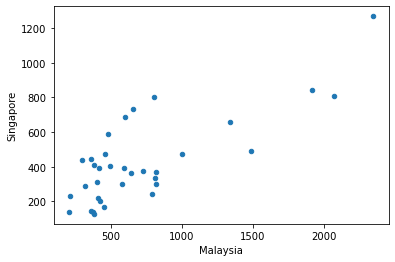

In [98]:
# secara visual, scatter plot
df_mysg.plot(kind="scatter", x="Malaysia", y="Singapore")

In [99]:
df_mysg["Malaysia"].corr(df_mysg["Singapore"])

0.771549664108142

In [100]:
# coba lagi untuk China dan India

df_cnin = df_can.loc[["China", "India"]].T
df_cnin.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


<AxesSubplot:xlabel='China', ylabel='India'>

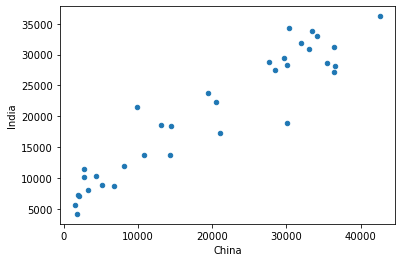

In [101]:
df_cnin.plot(kind="scatter", x="China", y="India")

In [102]:
df_cnin["China"].corr(df_cnin["India"])

0.94316189731992

In [103]:
df_cnin["China"].corr(df_cnin["China"])

1.0

In [105]:
r, p = scipy.stats.pearsonr(df_cnin["China"], df_cnin["India"])
print(r)

0.9431618973199201
